# TD3 Results when used on OpenAI's Pendulum-v1 environment

In [2]:
from train_loops import gym_train_td3, gym_test_td3
import matplotlib.pyplot as plt
import gymnasium as gym
from gym.wrappers import TimeLimit
env = TimeLimit(gym.make("Pendulum-v1"), max_episode_steps=300)

## Hyperparameters used

In [5]:
policy_args = {
    "lr": 3e-4,
    "sigma": 1.0,
    "noise_clip": 0.7,
    "policy_interval": 2,
    "tau": 0.005,
    "gamma": 0.99
}

## Return trend

Below I will plot the trend of the return across increasing episodes, averaged over multiple independently trained agents (with the same hyperparameters)

In [10]:
# Get trained model and obtained results
num_episodes = 30
batch_size = 128
buffer_size = 50000
warmup_amount = 300
model, avg_returns, loss_Q1, loss_Q2, loss_actor = gym_train_td3(env, num_episodes, batch_size, buffer_size, warmup_amount, **policy_args)
episodes = range(1,len(avg_returns)+1)

0.0003
Episode:  1
Average return:  -6.325910781836028
Average loss Q1:  2.2893811766803265
Average loss Q2:  2.240215437412262
Average loss actor:  0.9970894321799278
Episode:  2
Average return:  -8.027721677838398
Average loss Q1:  0.5157458908110857
Average loss Q2:  0.524505532309413
Average loss actor:  1.7021392643451692
Episode:  3
Average return:  -8.112649764235018
Average loss Q1:  0.3589940324425697
Average loss Q2:  0.3619181605428457
Average loss actor:  1.5188047766685486
Episode:  4
Average return:  -5.9139737449212
Average loss Q1:  0.45258607633411885
Average loss Q2:  0.42466573402285573
Average loss actor:  1.4840333902835845
Episode:  5
Average return:  -6.592424755408715
Average loss Q1:  0.3590487515553832
Average loss Q2:  0.344960700571537
Average loss actor:  1.4709649610519409
Episode:  6
Average return:  -6.6693008542579495
Average loss Q1:  0.30855205457657575
Average loss Q2:  0.2973819474875927
Average loss actor:  1.441364369392395
Episode:  7
Average ret

Text(0, 0.5, 'Loss(Actor)')

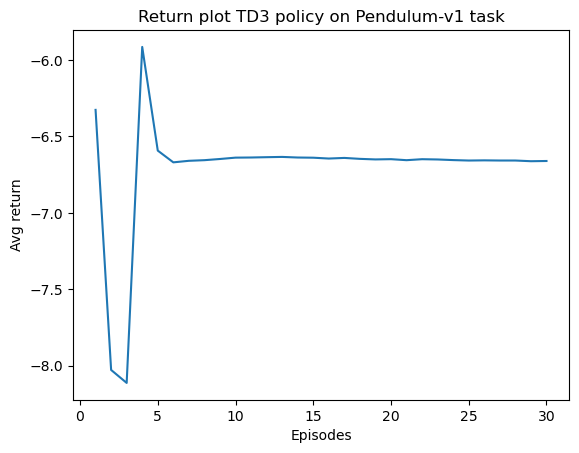

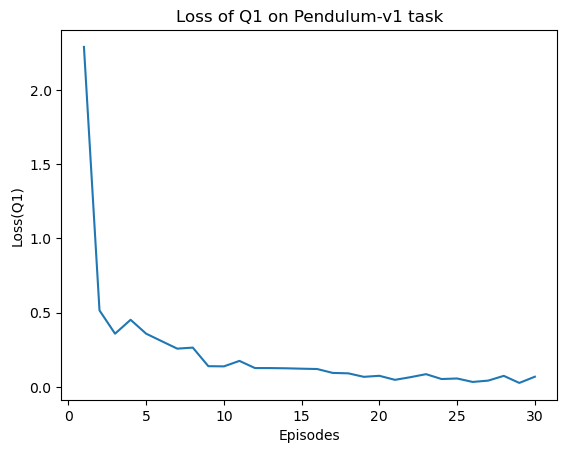

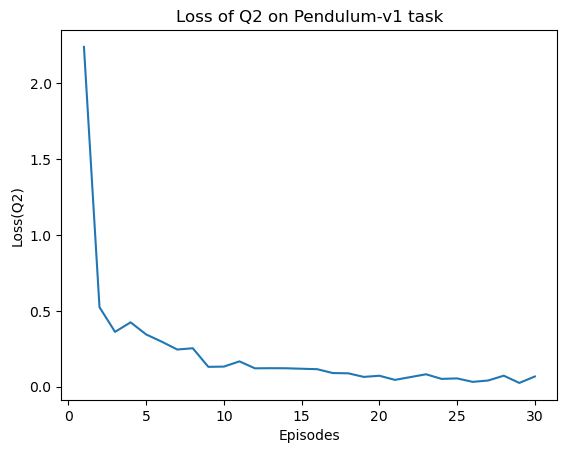

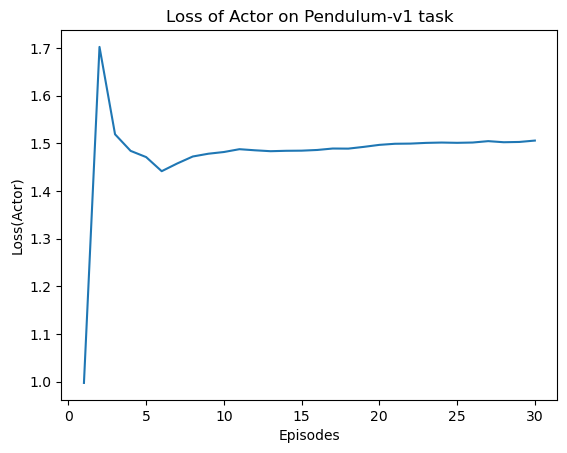

In [12]:
# Plot the results of training
plt.figure()
plt.title("Return plot TD3 policy on Pendulum-v1 task")
plt.plot(episodes, avg_returns)
plt.xlabel("Episodes")
plt.ylabel("Avg return")

plt.figure()
plt.title("Loss of Q1 on Pendulum-v1 task")
plt.plot(episodes, loss_Q1)
plt.xlabel("Episodes")
plt.ylabel("Loss(Q1)")

plt.figure()
plt.title("Loss of Q2 on Pendulum-v1 task")
plt.plot(episodes, loss_Q2)
plt.xlabel("Episodes")
plt.ylabel("Loss(Q2)")

plt.figure()
plt.title("Loss of Actor on Pendulum-v1 task")
plt.plot(episodes, loss_actor)
plt.xlabel("Episodes")
plt.ylabel("Loss(Actor)")

In [18]:
# Test the model
env = gym.make("Pendulum-v1", render_mode="human")
gym_test_td3(env, model)
env.close()